In [646]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import requests
from IPython.display import display
import json
import re

# Import dataframes, merge

In [1129]:
df_ratings = pd.read_csv('BX-Book-Ratings.csv', encoding='latin-1', error_bad_lines=False, sep=';')
df_users = pd.read_csv('BX-Users.csv', encoding='latin-1', error_bad_lines=False, sep=';')
df_books = df = pd.read_csv('BX-Books.csv', encoding='latin-1', error_bad_lines=False, sep=';')

C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_1884\3728704325.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_ratings = pd.read_csv('BX-Book-Ratings.csv', encoding='latin-1', error_bad_lines=False, sep=';')
C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_1884\3728704325.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_users = pd.read_csv('BX-Users.csv', encoding='latin-1', error_bad_lines=False, sep=';')
C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_1884\3728704325.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_books = df = pd.read_csv('BX-Books.csv', encoding='latin-1', error_bad_lines=False, sep=';')
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fie

# Users EDA

In [1130]:
df_users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [1131]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## Location - data visualisation and transformation

In [1132]:
# Separate location into city, country and state
df_users[['City', 'Country', 'State']] = df_users['Location'].str.split(', ', 2, expand=True)

In [1133]:
df_users.drop('Location', axis=1, inplace=True)

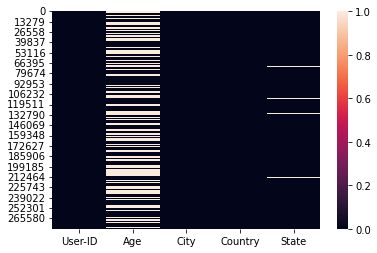

In [1134]:
# Visualise NaN values
sns.heatmap(df_users.isnull())
plt.show()

In [1190]:
# Sum of NaN values
df_users.isnull().sum()

User-ID         0
Age        109485
City            0
Country         0
State           0
dtype: int64

TODO: Search state

In [1136]:
# Drop NaN values from states
df_users.dropna(subset=['State'], inplace=True)

### Display top cities, countries, states

In [1137]:
df_users_category = df_users.select_dtypes('object')

In [1138]:
df_users_category.head(3)

,City,Country,State
0,nyc,new york,usa
1,stockton,california,usa
2,moscow,yukon territory,russia


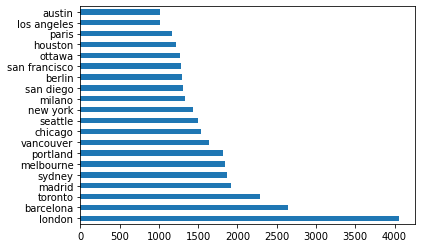

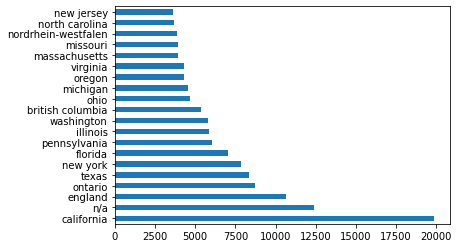

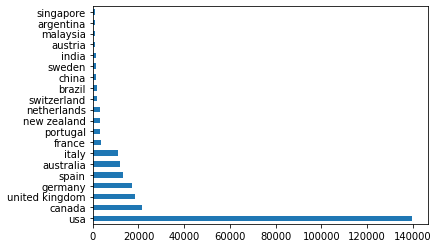

In [1139]:
for col in df_users_category.columns:
    plt.subplots(1) 
    df_users_category[col].value_counts()[:20].plot(kind='barh')
    print('')

In [1140]:
df_users['State'].unique()

array(['usa', 'russia', 'portugal', ..., 'la svizzera', 'hernando',
       'united kingdom.'], dtype=object)

In [1141]:
# List of top 60 countries
top_countries = df_users_category["Country"].value_counts().head(60).index

In [1142]:
top_countries

Index(['california', 'n/a', 'england', 'ontario', 'texas', 'new york',
       'florida', 'pennsylvania', 'illinois', 'washington', 'british columbia',
       'ohio', 'michigan', 'oregon', 'virginia', 'massachusetts', 'missouri',
       'nordrhein-westfalen', 'north carolina', 'new jersey', 'victoria',
       'new south wales', 'georgia', 'minnesota', 'lombardia', 'alberta',
       'colorado', 'arizona', 'wisconsin', 'maryland', 'indiana', 'tennessee',
       'bayern', 'alabama', 'baden-wuerttemberg', 'connecticut',
       'south carolina', 'madrid', 'queensland', 'lazio', 'louisiana',
       'barcelona', 'kentucky', 'hessen', 'quebec', 'scotland', 'iowa',
       'kansas', 'niedersachsen', 'berlin', 'new mexico', 'oklahoma',
       'catalunya', 'western australia', 'maine', 'emilia romagna',
       'new hampshire', 'south australia', 'nova scotia', 'nebraska'],
      dtype='object')

In [1143]:
# Change values not in top countries to 'other'
df_users_category.loc[:, "Country"][~df_users_category["Country"].isin(top_countries)] = 'other'

In [1144]:
df_users_category

,City,Country,State
0,nyc,new york,usa
1,stockton,california,usa
2,moscow,other,russia
3,porto,other,portugal
4,farnborough,other,united kingdom
...,...,...,...
278853,portland,oregon,usa
278854,tacoma,washington,united kingdom
278855,brampton,ontario,canada
278856,knoxville,tennessee,usa


## Age - data visualisation and transformation

In [1145]:
df_users['Age'].fillna(method='ffill')

0          NaN
1         18.0
2         18.0
3         17.0
4         17.0
          ... 
278853    17.0
278854    50.0
278855    50.0
278856    50.0
278857    50.0
Name: Age, Length: 274281, dtype: float64

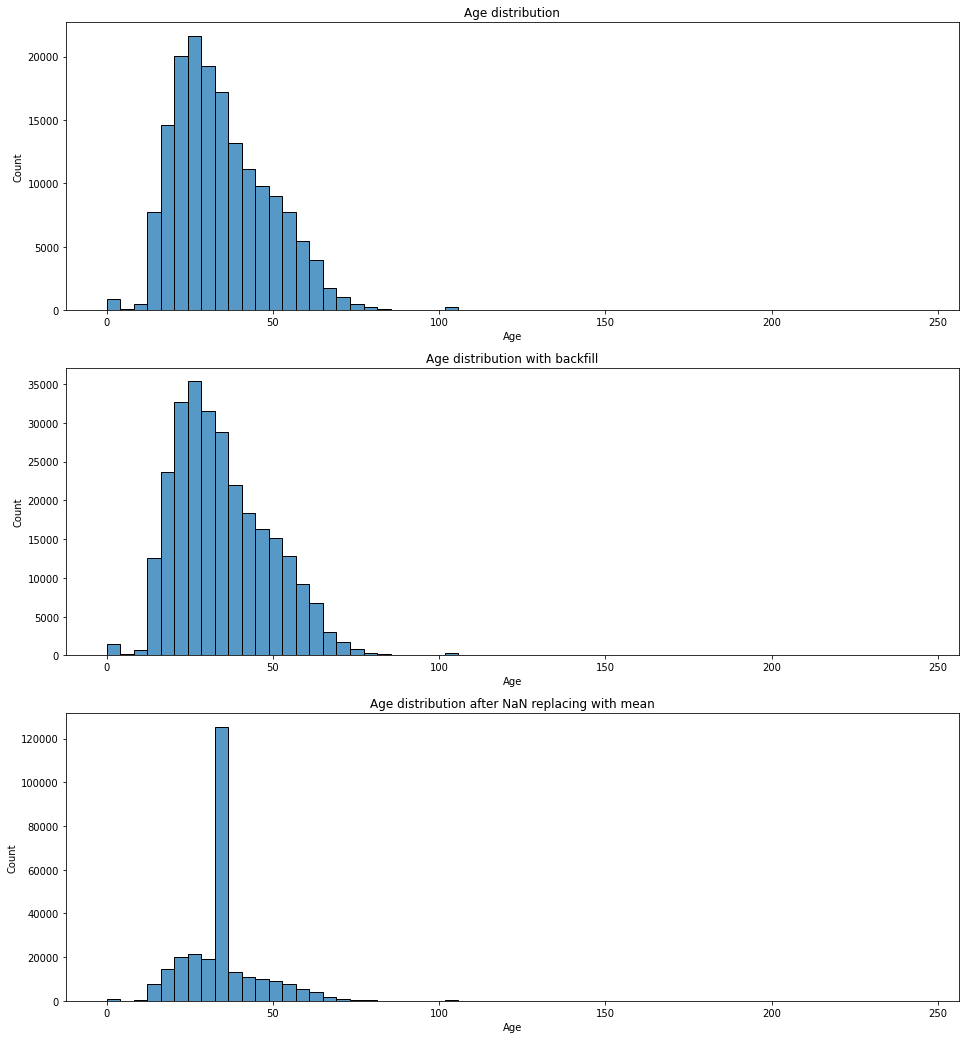

In [1146]:
plt.figure(figsize=(16, 18))
plt.subplot(3, 1, 1)
sns.histplot(df_users['Age'], bins=60)
plt.title('Age distribution')

plt.subplot(3, 1, 2)
sns.histplot(df_users['Age'].fillna(method='backfill'), bins=60)
plt.title('Age distribution with backfill')

plt.subplot(3, 1, 3)
sns.histplot(df_users['Age'].fillna(df_users['Age'].mean()), bins=60)
plt.title('Age distribution after NaN replacing with mean')
plt.show()

In [1147]:
# Replace values over 100 and under 8 to NaN
df_users.loc[(df_users['Age'] > 100), 'Age'] = np.nan
df_users.loc[(df_users['Age'] < 8), 'Age'] = np.nan

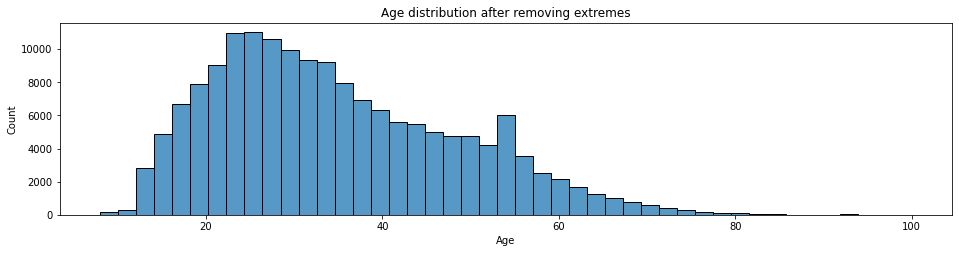

In [1148]:
plt.figure(figsize=(16, 12))
plt.subplot(3, 1, 1)
sns.histplot(df_users['Age'], bins=45)
plt.title('Age distribution after removing extremes')
plt.show()

# Books EDA 

In [1149]:
df_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [1150]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


## Publisher - data visualsation and transformation

In [1151]:
publishers_rating = pd.DataFrame(df_books['Publisher'].value_counts())

In [1152]:
# Scale publisher according to occurence and add to df
publishers_rating['Publishers_frequency'] = df_books['Publisher'].value_counts().values / df_books['Publisher'].value_counts().max()
publishers_rating['Publisher'] = publishers_rating.index

In [1153]:
df_books = pd.merge(publishers_rating, df_books, on=["Publisher"])

In [1191]:
publishers_rating['Publisher']

Harlequin                                Harlequin
Silhouette                              Silhouette
Pocket                                      Pocket
Ballantine Books                  Ballantine Books
Bantam Books                          Bantam Books
                                    ...           
Hannover House                      Hannover House
Amber Quill Press, LLC.    Amber Quill Press, LLC.
Lunchbox Press                      Lunchbox Press
Ugly Town                                Ugly Town
Connaught                                Connaught
Name: Publisher, Length: 16807, dtype: object

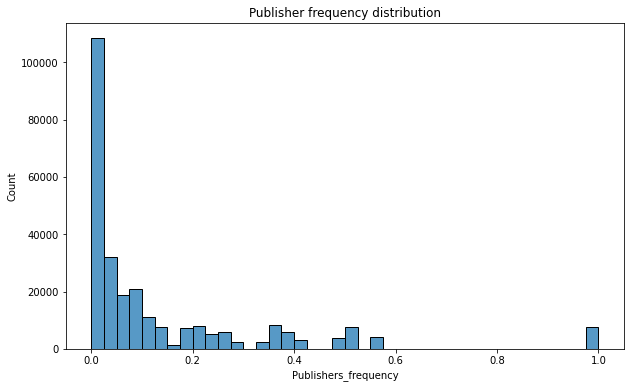

In [1154]:
plt.figure(figsize=(10, 6))
sns.histplot(df_books['Publishers_frequency'], bins=40)
plt.title('Publisher frequency distribution')
plt.show()

## Year of publication - data visualisation and transformation

In [1155]:
# Drop strange values
df_books.drop(df_books[df_books['Year-Of-Publication'] == 'DK Publishing Inc'].index, inplace=True)
df_books.drop(df_books[df_books['Year-Of-Publication'] == 'Gallimard'].index, inplace=True)

In [1156]:
# Recast values to numeric
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].astype('int64')

In [1157]:
df_books['Year-Of-Publication'].value_counts().index.sort_values()

Int64Index([   0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906,
            ...
            2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050],
           dtype='int64', length=116)

In [1158]:
higher_years = (df_books['Year-Of-Publication' ] > 2010).sum()
lower_years = (df_books['Year-Of-Publication' ] < 1950).sum()
print(f' Count of years below 1897 is {lower_years} and above 2022 is {higher_years}')

 Count of years below 1897 is 4911 and above 2022 is 20


In [1159]:
df_books[df_books['Year-Of-Publication' ]  < 1950].index

Int64Index([  3243,  12615,  12706,  12775,  12776,  12777,  12778,  12781,
             12892,  13059,
            ...
            271087, 271105, 271162, 271188, 271189, 271191, 271197, 271256,
            271262, 271277],
           dtype='int64', length=4911)

In [1160]:
# Drop high and low values
df_books.drop(df_books[df_books['Year-Of-Publication' ]  < 1950].index, inplace=True)
df_books.drop(df_books[df_books['Year-Of-Publication' ]  > 2010].index, inplace=True)

Text(0.5, 1.0, 'Year of publication after removing extreme values')

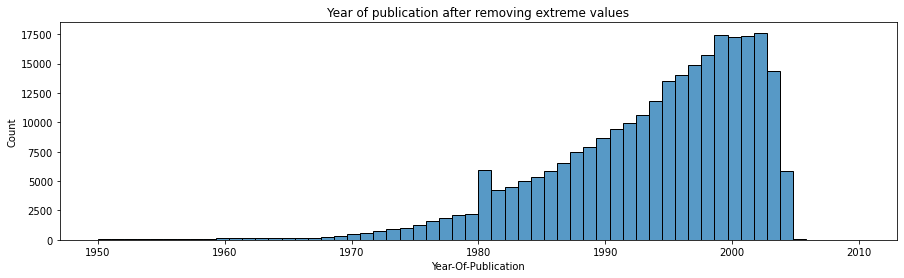

In [1161]:
plt.figure(figsize=(15,4))
sns.histplot(df_books['Year-Of-Publication'], bins=58)
plt.title('Year of publication after removing extreme values')

## Most common authors

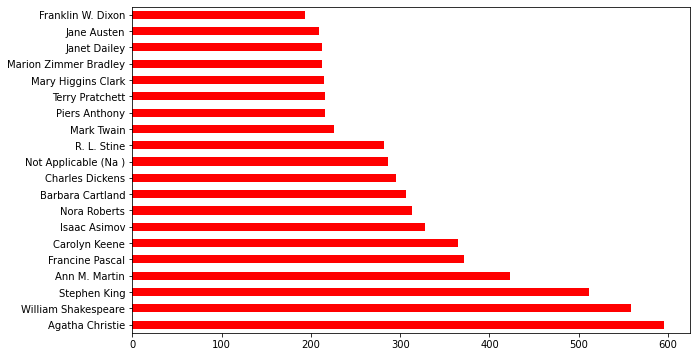

In [1162]:
plt.figure(figsize=(10, 6))
df_books['Book-Author'].value_counts()[:20].plot(kind='barh', color='red')
plt.show()

# Ratings EDA

## Book Rating - visualisation and transformation

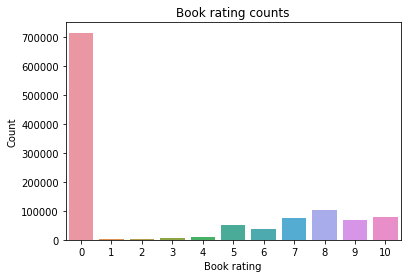

In [1163]:
sns.countplot(x='Book-Rating', data=df_ratings)
plt.title('Book rating counts')
plt.xlabel('Book rating')
plt.ylabel('Count')
plt.show()

In [1164]:
# Drop 0, because it is probably not an added value
df_ratings.drop(df_ratings[df_ratings['Book-Rating'] == 0].index, inplace=True)

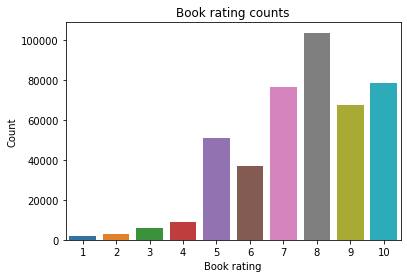

In [1165]:
sns.countplot(x='Book-Rating', data=df_ratings)
plt.title('Book rating counts')
plt.xlabel('Book rating')
plt.ylabel('Count')
plt.show()

### Activity of users visualisation

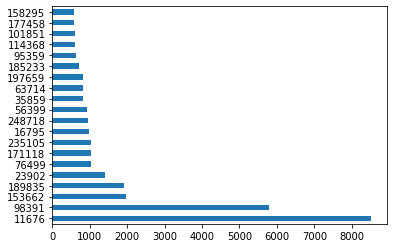

In [1166]:
# User 11676 was proactive
df_ratings['User-ID'].value_counts()[:20].plot(kind='barh')
plt.show()

### Count average rating of the books

In [1167]:
# Mean rating of the book
mean_book_rating = df_ratings.groupby('ISBN')['Book-Rating'].mean()
mean_book_rating = pd.DataFrame(mean_book_rating)
# mean_book_rating['ISBN'] = mean_book_rating.index
mean_book_rating = mean_book_rating.reset_index()

In [1168]:
df_books = pd.merge(df_books, mean_book_rating, on='ISBN')

In [1169]:
df_books = df_books.rename(columns={'Book-Rating':'Book-Average-Rating'})

### Count average rating of the author

In [1170]:
df_author_rating = pd.merge(df_ratings, df_books, on='ISBN')

In [1171]:
df_author_rating

,User-ID,ISBN,Book-Rating,Publisher,Publishers_frequency,Book-Title,Book-Author,Year-Of-Publication,Image-URL-S,Image-URL-M,Image-URL-L,Book-Average-Rating
0,276726,0155061224,5,Heinle,0.003716,Rites of Passage,Judith Rae,2001,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,5.000000
1,276729,052165615X,3,Cambridge University Press,0.043663,Help!: Level 1,Philip Prowse,1999,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,3.000000
2,276729,0521795028,6,Cambridge University Press,0.043663,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,6.000000
3,276744,038550120X,7,Doubleday,0.051360,A Painted House,JOHN GRISHAM,2001,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,7.580247
4,11676,038550120X,10,Doubleday,0.051360,A Painted House,JOHN GRISHAM,2001,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,7.580247
...,...,...,...,...,...,...,...,...,...,...,...,...
377713,276688,0425156737,2,Berkley Publishing Group,0.367750,Graven Images,Jane Waterhouse,1997,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...,http://images.amazon.com/images/P/0425156737.0...,2.000000
377714,276688,0671563149,6,Pocket,0.518248,MUDDY WATER (Peter Bartholomew Mysteries),Sally Gunning,1997,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...,http://images.amazon.com/images/P/0671563149.0...,6.000000
377715,276688,1575660792,7,Kensington Publishing Corporation,0.109091,Gray Matter,Shirley Kennett,1996,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,7.000000
377716,276704,0380796155,5,Eos,0.051095,White Abacus,Damien Broderick,1998,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...,http://images.amazon.com/images/P/0380796155.0...,5.000000


In [1172]:
df_author_rating = df_author_rating.groupby('Book-Author')['Book-Rating'].mean()
pd.DataFrame(df_author_rating)
df_author_rating['Book-Author'] = df_author_rating.index
df_author_rating = df_author_rating.reset_index()

In [1173]:
df_books = pd.merge(df_books, df_author_rating, on='Book-Author')
df_books = df_books.rename(columns={'Book-Rating':'Author-Average-Rating'})

In [1174]:
df_books['Author-Average-Rating'] = df_books['Author-Average-Rating'].astype('float64')

### Merge book title and author

In [1175]:
# Make column Title Author - book and author together
df_books['Title_Author'] = df_books['Book-Title'] + ' by ' + df_books['Book-Author']

In [1192]:
df_books['Title_Author']

0                       Powder and Patch by Georgette Heyer
1                          The Foundling by Georgette Heyer
2                         The Black Moth by Georgette Heyer
3                    Convenient Marriage by Georgette Heyer
4                           The Nonesuch by Georgette Heyer
                                ...                        
146923                                 Spear by Doug Hewitt
146924                         Devil's Brew by Keith Spence
146925                        Leah's Way by Richard Botelho
146926    Blood, Money &amp; Power: How L.B.J. Killed J....
146927                     Cocktail Classics by David Biggs
Name: Title_Author, Length: 137106, dtype: object

# Books, Ratings, Users EDA

### Merge dataframes

In [1176]:
rated_books = pd.merge(df_ratings, df_books, on=["ISBN"])
df_books_users = pd.merge(rated_books, df_users, on=['User-ID']).drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1)

### Most rated authors

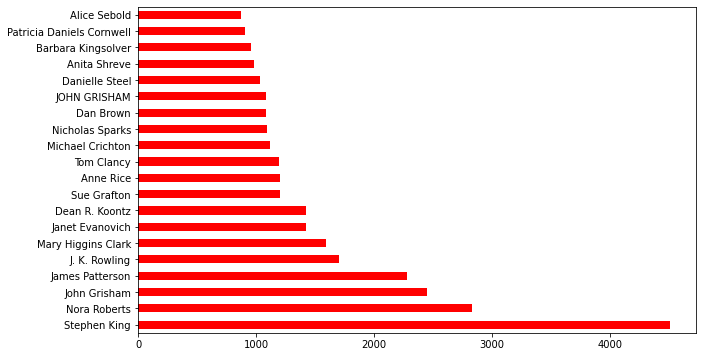

In [1177]:
plt.figure(figsize=(10, 6))
df_books_users['Book-Author'].value_counts()[:20].plot(kind='barh', color='red')
plt.show()

### Most rated books

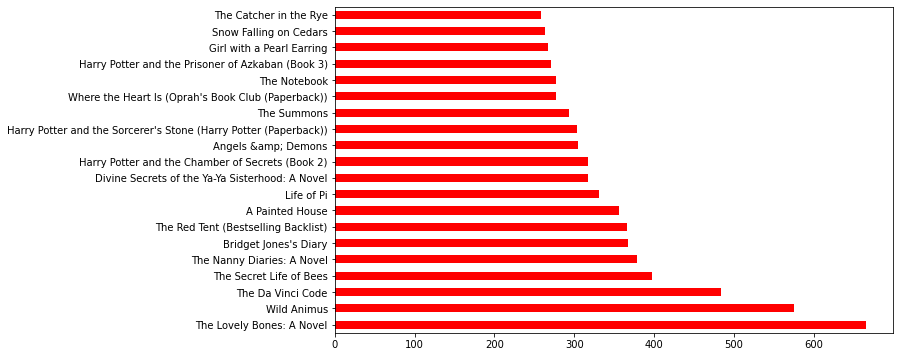

In [1178]:
plt.figure(figsize=(10, 6))
df_books_users['Book-Title'].value_counts()[:20].plot(kind='barh', color='red')
plt.show()

In [1179]:
PALLETES= ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter']

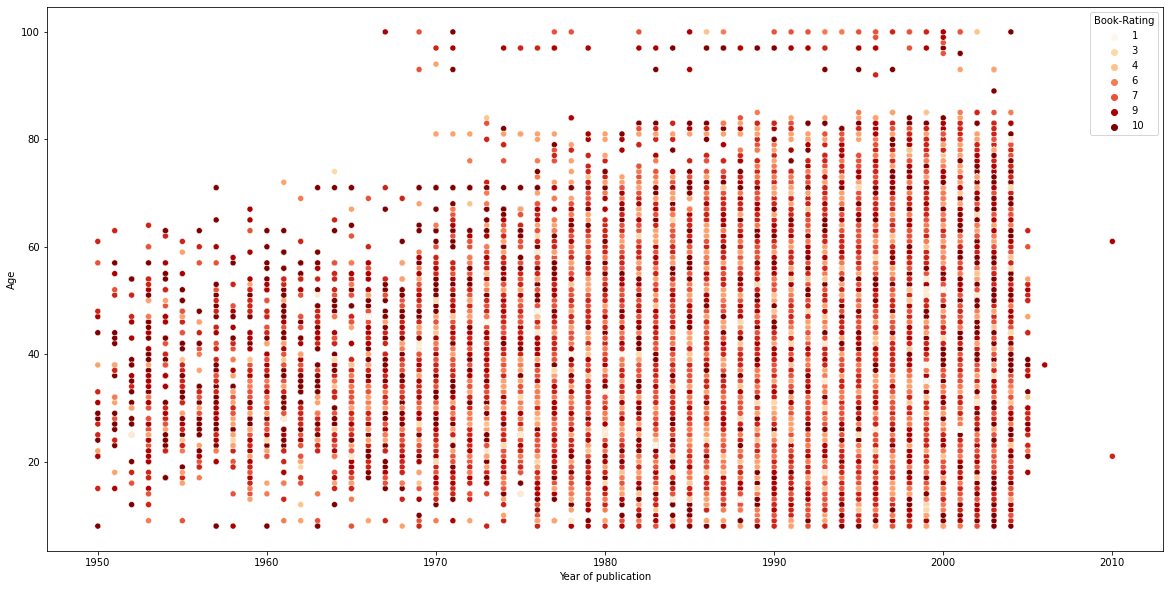

In [1180]:
plt.figure(figsize=(20, 10))
sns.scatterplot(y='Age', x='Year-Of-Publication', data=df_books_users, hue='Book-Rating', palette=PALLETES[20])
plt.xlabel('Year of publication')
plt.ylabel('Age')
plt.show()

# Data engineering

### One hot encoding

In [450]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()
# transformed = ohe.fit_transform(df_books_users[['Country']]).toarray()

In [451]:
# labels = ohe.categories_
# labels = np.array(labels).ravel()

In [452]:
# encoded_country = pd.DataFrame(transformed, columns=labels)

In [453]:
# df_books_users = pd.concat([encoded_country, df_books_users], axis=1)

## Imputing NaN values

In [454]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer, KNNImputer

In [455]:
# impute_knn = KNNImputer(n_neighbors=5)
# df_recommendation.iloc[:,:] = impute_knn.fit_transform(df_recommendation)

### Dataframe for recommendation

In [1117]:
df_books

,Publisher,Publishers_frequency,ISBN,Book-Title,Book-Author,Year-Of-Publication,Image-URL-S,Image-URL-M,Image-URL-L,Book-Average-Rating
0,Harlequin,1.000000,0373836023,Powder and Patch,Georgette Heyer,2004,http://images.amazon.com/images/P/0373836023.0...,http://images.amazon.com/images/P/0373836023.0...,http://images.amazon.com/images/P/0373836023.0...,7.333333
1,Harlequin,1.000000,0373037430,Rush to the Altar (Twin Brides),Rebecca Winters,2003,http://images.amazon.com/images/P/0373037430.0...,http://images.amazon.com/images/P/0373037430.0...,http://images.amazon.com/images/P/0373037430.0...,9.000000
2,Harlequin,1.000000,0373750013,The Virgin's Secret Marriage The Brides Of H...,Cathy Gillen Thacker,2003,http://images.amazon.com/images/P/0373750013.0...,http://images.amazon.com/images/P/0373750013.0...,http://images.amazon.com/images/P/0373750013.0...,9.000000
3,Harlequin,1.000000,0373123485,On The Tycoon's Terms Do Not Disturb! (Harle...,Sandra Field,2003,http://images.amazon.com/images/P/0373123485.0...,http://images.amazon.com/images/P/0373123485.0...,http://images.amazon.com/images/P/0373123485.0...,7.000000
4,Harlequin,1.000000,0373123108,Sleeping Partners (Nine to Five),Helen Brooks,2003,http://images.amazon.com/images/P/0373123108.0...,http://images.amazon.com/images/P/0373123108.0...,http://images.amazon.com/images/P/0373123108.0...,10.000000
...,...,...,...,...,...,...,...,...,...,...
146924,Polaris Books,0.000133,0974144304,The Holy Land,Robert Zubrin,2003,http://images.amazon.com/images/P/0974144304.0...,http://images.amazon.com/images/P/0974144304.0...,http://images.amazon.com/images/P/0974144304.0...,9.000000
146925,Hannover House,0.000133,0963784625,"Blood, Money &amp; Power: How L.B.J. Killed J....",Barr McClellan,2003,http://images.amazon.com/images/P/0963784625.0...,http://images.amazon.com/images/P/0963784625.0...,http://images.amazon.com/images/P/0963784625.0...,6.000000
146926,"Amber Quill Press, LLC.",0.000133,1592798969,Sealed In Blood,Margaret L. Carter,2003,http://images.amazon.com/images/P/1592798969.0...,http://images.amazon.com/images/P/1592798969.0...,http://images.amazon.com/images/P/1592798969.0...,10.000000
146927,Ugly Town,0.000133,0972441220,Burn,Sean Doolittle,2003,http://images.amazon.com/images/P/0972441220.0...,http://images.amazon.com/images/P/0972441220.0...,http://images.amazon.com/images/P/0972441220.0...,5.000000


### Drop duplicates

In [1181]:
# Drop duplicates
df_books = df_books.drop_duplicates(subset=['Title_Author'])

### Select non-object types

In [1182]:
# Df for ML
df_recommendation = df_books.select_dtypes(['float64', 'int64'])

In [1183]:
df_recommendation

,Publishers_frequency,Year-Of-Publication,Book-Average-Rating,Author-Average-Rating
0,1.000000,2004,7.333333,7.757576
1,1.000000,2003,9.000000,7.757576
2,1.000000,2003,7.000000,7.757576
3,1.000000,2000,6.000000,7.757576
4,1.000000,2000,8.000000,7.757576
...,...,...,...,...
146923,0.000133,2002,8.000000,8.000000
146924,0.000133,2002,9.000000,9.000000
146925,0.000133,2004,9.000000,9.000000
146926,0.000133,2003,6.000000,6.000000


<AxesSubplot:>

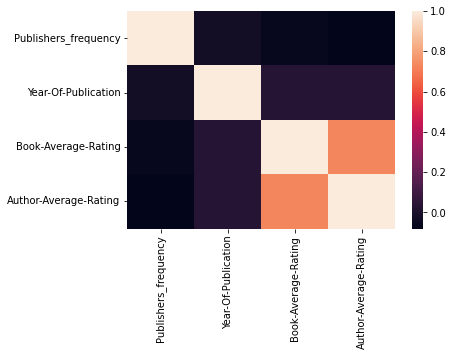

In [458]:
sns.heatmap(df_recommendation.corr())

### Build a model

In [1184]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(df_recommendation)
print(model_knn)

NearestNeighbors(algorithm='brute', metric='cosine')


### Predict nearest neighbors

In [1185]:
index = df_books[df_books['ISBN'] == '0373836023'].index[0]
print(index)
print(df_recommendation.iloc[index,:].values.reshape(1,-1))
distances, indices = model_knn.kneighbors(df_recommendation.iloc[index,:].values.reshape(1, -1), n_neighbors = 5)
df_recommendation.index[index]

0
[[1.00000000e+00 2.00400000e+03 7.33333333e+00 7.75757576e+00]]


C:\Users\Uzivatel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


0

In [1186]:
# Indexes of nearest books
indices[0]

array([   0, 1387, 2692, 2691, 2635], dtype=int64)

### Dataframe to find books

In [1187]:
df_books[df_books.index  == indices[0][i]]['Title_Author'].values.item()

'The Bodyguard by Joan Johnston'

In [1195]:
# Make df to search books info and delete duplicates
df_find_book = pd.concat([df_recommendation, df_books], axis=1)

# Search for nearest books

from tkinter import *
import math

from PIL import Image, ImageTk

# Build tkinter
window = Tk()
window.title('Book recommendation')
window.config(padx=100, pady=50, bg='white', highlightthickness=0)

# Update text after writing
def update(data):
    my_list.delete(0, END)
    for item in data:
        my_list.insert(END, item)
        
def fillout(e):
    my_entry.delete(0, END)
    my_entry.insert(0, my_list.get(ANCHOR))

def check(e):
    typed_list = []
    typed = my_entry.get()
    if typed == '':
        data = result_books
    else:
        data = []
        for item in result_books:
            if typed.lower() in item.lower():
                data.append(item)
                typed_list.append(typed)
    update(data)
    return typed_list[-1]

# Save searched book to txt file and find nearest according to index from indices
def save_book():
    global df_recommendation
    global df_books
    
    # Get book and save to txt
    book = my_entry.get()
    file = open('book_atr.txt', 'w')
    file.write(book)
    file.close()
    window.destroy()
    with open ('book_atr.txt', 'r') as name:
        lines = name.readlines()
    book_name_inside = lines[0]
    
    # Mark ISBN as primary key to find nearest books info
    isbn = df_books[df_books['Title_Author'] == book_name_inside]['ISBN'].values.item()
    images_large = []
    book_names = []
    book_authors = []
    
    # Searched book info

    my_book_name = df_books[df_books['ISBN'] == isbn]['Title_Author'].values.item()
    
    # Find nearest neighbours
    model_knn.fit(df_recommendation)
    index = df_books[df_books['ISBN'] == isbn].index[0]
    print(df_recommendation.iloc[index,:].values.reshape(1,-1))
    distances, indices = model_knn.kneighbors(df_recommendation.iloc[index,:].values.reshape(1, -1), n_neighbors = 50000)
    df_recommendation.index[index]
    df_find_book = pd.concat([df_recommendation, df_books], axis=1)
    
    # Print nearest neighbours
    for i in range(6):
        
        book_name = df_books[df_books.index  == indices[0][i]]['Title_Author'].values.item()
        book_author = df_books[df_books.index  == indices[0][i]]['Book-Author'].values.item()
        book_names.append(book_name)
        book_authors.append(book_author)
        
    df_result = {'Title': [df_books[df_books.index  == indices[0][i]]['Book-Title'].values.item() for i in range (6)],
                 'Author': [df_books[df_books.index  == indices[0][i]]['Book-Author'].values.item() for i in range (6)],
        'Year of publication': [df_books[df_books.index  == indices[0][i]]['Year-Of-Publication'].values.item() for i in range (6)], 
         'Book rating': [df_books[df_books.index  == indices[0][i]]['Book-Average-Rating'].values[0].round(1) for i in range (6)],
         'Author rating': [df_books[df_books.index  == indices[0][i]]['Author-Average-Rating'].values[0].round(1) for i in range(6)] 
                           }
    df_result = pd.DataFrame(df_result)
    display(df_result)

    # Save indices
    np.save('indices.npy', indices) 

# Tkinter features    
## Entries
title = Label(text='What Was the Last Book You Read?', fg='black', font=('Arial', 15, 'bold'), bg='white')
title.grid(column=0, row=0)

my_entry = Entry(window, font=('Helvetica', 10), width=100)
my_entry.grid(column=0, row=1)

my_list = Listbox(window, width=100) 
my_list.grid(column=0, row=2)
 
result_books = df_find_book['Title_Author'].values
update(result_books)

my_list.bind("<<ListboxSelect>>", fillout)
my_entry.bind("<KeyRelease>", check)

add_btn = Button(text='Search', width=100, command=save_book)
add_btn.grid(column=0, row=3, columnspan=2, sticky='W')

window.mainloop()

[[3.35766423e-02 1.99800000e+03 1.00000000e+01 1.00000000e+01]]


C:\Users\Uzivatel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,Title,Author,Year of publication,Book rating,Author rating
0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,8.0,8.0
1,Multimedia and CD-ROMs for Dummies,Andy Rathbone,1994,5.0,6.7
2,Beyond Therapy,Christopher Durang,1983,8.0,6.7
3,Raspberry Crush,Jill Winters,2004,9.0,7.6
4,Der Plan. JubilÃ?Â¤ums- Edition.,Gerhard Roth,2002,1.0,6.2
5,The Underdogs: A Novel of the Mexican Revoluti...,Mariano Azuela,2002,5.0,7.5


# Merge results from cover and book features

C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_1884\2907687827.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


,CNN_Rating,Neighbours_Rating,ISBN,Sum_rating,Book-Title,Book-Author
0,0,0,0026217457,0.0,Vegetarian Times Complete Cookbook,Lucy Moll
1,1,68,0028740173,54.6,EMOTIONAL LIFE OF THE TODDLER,Alicia F. Lieberman
2,79,735,0071425489,603.8,How to Sell Anything on eBay . . . and Make a ...,Dennis Prince
3,58,792,0312287747,645.2,"Maggots, Murder, and Men: Memories and Reflect...",Zakaria Erzinclioglu
4,61,905,038531843X,736.2,What Your Second Grader Needs to Know: Fundame...,E. D. Hirsch


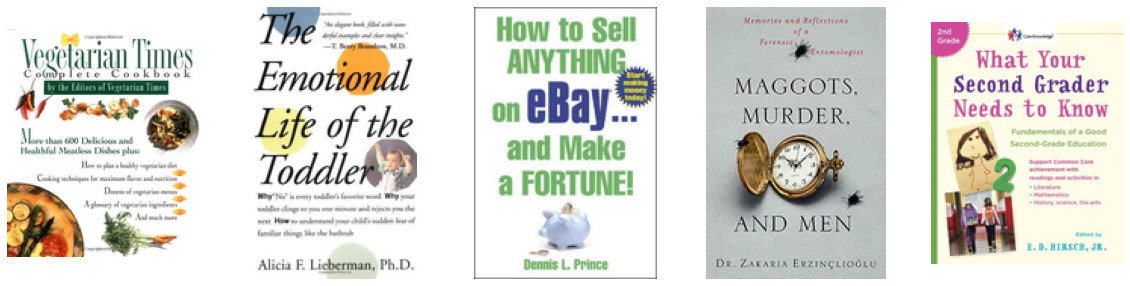

In [1198]:
find_common(0.2, 0.8)

In [1063]:
def find_common(isbn_weight, indices_weight):
    """
    Put a weight to cover or book description rating
    """
    # Import saved books
    indices = np.load('indices.npy') # Load KNN
    open_isbns = open('isbns.json')
    isbns = json.load(open_isbns) # Load CNN
    isbns_list = list(isbns.values())
    isbns_ = []
    for string in isbns_list:
        isbns_.append(string[15:-4])
    # Make dfs from books and search for attributes  
    df_isbns = pd.DataFrame(isbns_)
    df_isbns = df_isbns.rename(columns={0:"ISBN"})
    df_indices = pd.DataFrame({'Indices': [df_books[df_books.index  == indices[0][i]]['ISBN'].values for i in range(5000)]})
    df_indices = pd.DataFrame([str(line).strip('[').strip(']') for line in df_indices['Indices']])
    df_indices = pd.DataFrame([str(line).strip("'").strip("'") for line in df_indices.iloc[:, 0]])
    df_indices = df_indices.rename(columns={0:"Indices"})
    
    # Make a rating based on indexes of how far books are (nearest book is index 1)
    indices_rating = df_indices[df_indices['Indices'].isin(df_isbns['ISBN'])]
    isbns_rating = df_isbns[df_isbns['ISBN'].isin(df_indices['Indices'])]
     
    # Connect 2 dataframes and search for similar books by ISBN
    df_rating = pd.DataFrame({'CNN_Rating':isbns_rating.sort_values(by=['ISBN']).index, 'Neighbours_Rating':indices_rating.sort_values(by=['Indices']).index, 'ISBN': indices_rating.sort_values(by=['Indices'])['Indices']})
    df_rating['Sum_rating'] = (df_rating['CNN_Rating']*isbn_weight) + (df_rating['Neighbours_Rating']*indices_weight)
    
    # Make final df
    df_final = pd.merge(df_rating.sort_values(by=['Sum_rating']), df_books, on='ISBN')
    df_final = df_final.loc[:,['CNN_Rating', 'Neighbours_Rating', 'ISBN', 'Sum_rating', 'Book-Title', 'Book-Author', 'Image-URL-L']]
    adresses = df_final.iloc[0:5,]['Image-URL-L']
    
    # Download covers
    images_large = []
    size = 180, 180
    for i in range (5):                               
        img = Image.open(requests.get(adresses[i], stream = True).raw)
        img.thumbnail(size, Image.ANTIALIAS)
        images_large.append(img)

    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    for i in range(5):
        if i == 0:
            axs[i].imshow(images_large[i])
            # axs[i].set_title(f'Because you read: \n{img[i]}', size=16)
            axs[i].axis("off")
        elif i == 1:
            # axs[i].set_title(f'You should also read: {img[i]}', size=16),
            axs[i].imshow(images_large[i])
            axs[i].axis("off")
        else:
            # axs[i].set_title(book_names[i], size=16)
            axs[i].imshow(images_large[i])
            axs[i].axis("off")
        fig.show()
    # Print final df
    df_final = df_final.loc[:,['CNN_Rating', 'Neighbours_Rating', 'ISBN', 'Sum_rating', 'Book-Title', 'Book-Author']].iloc[0:5,]
    return (df_final)